In [1]:
import numpy as np
import pandas as pd
import quantstats as qs
import yfinance as yf

qs.extend_pandas()

## VTIと特定の銘柄の比較レポート

In [2]:
GOOG_returns = qs.utils.download_returns("GOOG", period="2y")
GOOG_returns.head(10)

Date
2020-07-27         NaN
2020-07-28   -0.019514
2020-07-29    0.014450
2020-07-30    0.006196
2020-07-31   -0.031663
2020-08-03   -0.005739
2020-08-04   -0.006430
2020-08-05    0.005898
2020-08-06    0.017976
2020-08-07   -0.003740
Name: Close, dtype: float64

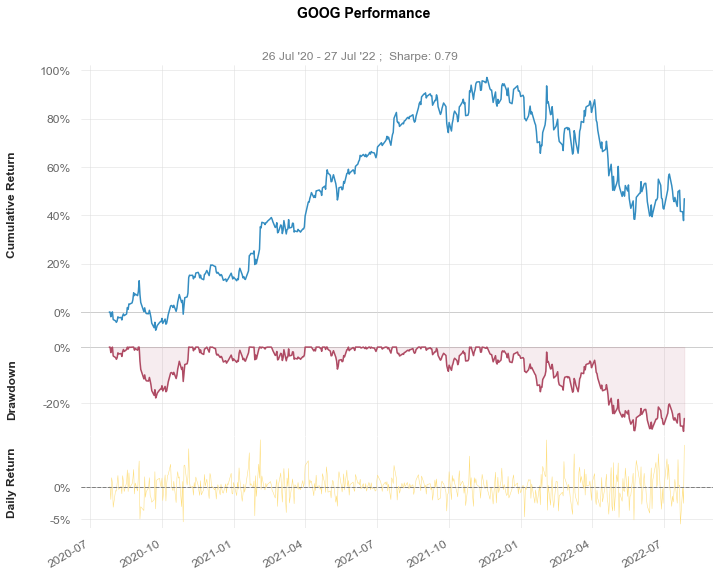

In [3]:
qs.stats.sharpe(GOOG_returns)
qs.plots.snapshot(GOOG_returns, title="GOOG Performance")
qs.reports.html(GOOG_returns, "VTI", download_filename="GOOGとVTIの比較.html")

## 複数銘柄のパフォーマンス比較レポート
すべての銘柄を等しい割合で保有していた場合のリターンを、SP500と比較して見ます。
銘柄のオアフォーマンスを計算するには株価の変化率の系列が必要なので、`pandas.DataFrame.pct_change` を用いて変化率の系列を求めています。

[pandas.DataFrame.pct_change](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html)

In [4]:
# ポートフォリオ内での各銘柄の比重
stock_dict = {
    "MSFT": 0.3,
    "AAPL": 0.3,
    "AMZN": 0.2,
    "GOOG": 0.1,
    "TSLA": 0.1,
}

# 株価の系列
stock_prices_df = yf.download(
    list(stock_dict.keys()), start="2021-01-01", end="2022-01-01", adjusted=True
).dropna()

stock_prices_df.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                                 \
                  AAPL        AMZN       GOOG        MSFT        TSLA   
Date                                                                    
2020-12-31  131.515976  162.846497  87.594002  219.604477  705.669983   
2021-01-04  128.264984  159.331497  86.412003  214.934341  729.770020   
2021-01-05  129.850830  160.925507  87.045998  215.141708  735.109985   
2021-01-06  125.479843  156.919006  86.764503  209.563217  755.979980   
2021-01-07  129.761627  158.108002  89.362503  215.526749  816.039978   

                 Close                                                 ...  \
                  AAPL        AMZN       GOOG        MSFT        TSLA  ...   
Date                                                                   ...   
2020-12-31  132.690002  162.846497  87.594002  222.419998  705.669983  ...   
2021-01-04  129.410004  159.331497  86.412003  217.690002  729.770020  ...   
2021-01-05  131.009995  160.925507  87.045998  217.899994  735.109985  ...   
2021-01-06  126.599998  156.919006  86.764503  212.250000  755.979980  ...   
2021-01-07  130.919998  158.108002  89.362503  218.289993  816.039978  ...   

                  Open                                                 \
                  AAPL        AMZN       GOOG        MSFT        TSLA   
Date                                                                    
2020-12-31  134.080002  163.750000  86.771004  221.699997  699.989990   
2021-01-04  133.520004  163.500000  87.876999  222.529999  719.460022   
2021-01-05  128.889999  158.300507  86.250000  217.259995  723.659973   
2021-01-06  127.720001  157.324005  85.131500  212.169998  758.489990   
2021-01-07  128.360001  157.850006  87.002998  214.039993  777.630005   

               Volume                                          
                 AAPL      AMZN      GOOG      MSFT      TSLA  
Date                                                           
2020-12-31   99116600  59144000  20238000  20942100  49649900  
2021-01-04  143301900  88228000  38038000  37130100  48638200  
2021-01-05   97664900  53110000  22906000  23823000  32245200  
2021-01-06  155088000  87896000  52042000  35930700  44700000  
2021-01-07  109578200  70290000  45300000  27694500  51498900  

[5 rows x 30 columns]

In [5]:
returns_df = stock_prices_df["Adj Close"].pct_change().dropna()
returns_df.head()

,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2021-01-04,-0.024719,-0.021585,-0.013494,-0.021266,0.034152
2021-01-05,0.012364,0.010004,0.007337,0.000965,0.007317
2021-01-06,-0.033662,-0.024897,-0.003234,-0.025929,0.028390
2021-01-07,0.034123,0.007577,0.029943,0.028457,0.079447
2021-01-08,0.008631,0.006496,0.011168,0.006093,0.078403


In [6]:
pf_returns = np.dot(list(stock_dict.values()), returns_df.T)
print(pf_returns[:10])

[-0.01530146  0.00900604 -0.01796814  0.0292891   0.01522123 -0.02670266
  0.00147393  0.01133956 -0.01243586 -0.00920839]


In [7]:
pf_returns_series = pd.Series(pf_returns, index=returns_df.index)

pf_returns_series.head(10)

Date
2021-01-04   -0.015301
2021-01-05    0.009006
2021-01-06   -0.017968
2021-01-07    0.029289
2021-01-08    0.015221
2021-01-11   -0.026703
2021-01-12    0.001474
2021-01-13    0.011340
2021-01-14   -0.012436
2021-01-15   -0.009208
dtype: float64

In [8]:
qs.reports.html(pf_returns_series, "VTI", download_filename="ポートフォリオのパフォーマンス.html")